# Imports

In [ ]:
from typing import List, Tuple
from tabulate import tabulate
from functools import reduce
import numpy as np
import random
from datetime import datetime

# Overview

# Algorithm
```
definição população
melhor_global = 0
laço
    eval_pop, melhor, pior1, pior2 = avaliação da população
    
    algum em eval_pop é melhor que o melhor_global:
        melhor_global <= melhor dentro dos valores de eval_pop

    filho1, filho2 <= offspring(pop, eval_pop)

    pior1 é substituido por filho1
    pior2 é substituido por filho2

    aplica mutação na população
```

# Representation

In [ ]:
DAY_DELIMITER = -1

In [ ]:
class Movie:
    def __init__(self, name: str, rating: float, duration: float, genres: List[str]):
        self.name = name
        self.rating = float(rating)
        self.duration = float(duration)
        self.genres = genres
    
    def __repr__(self):
        return f'{{{self.name} | {self.rating} | {self.duration}m}}'



In [ ]:
Chromossome = List[int]

In [ ]:
movies = []
index_precedence = []
with open('movies.csv', 'r') as file:
    movies = list(map(lambda line: Movie(line[0], line[3], line[4], [line[5], line[6]]), 
                      list(map(lambda line: line.split(','), file.readlines()[1:]))))

# Initial Population Generation

In [ ]:
def generate_random_chromossome(data_size: int):
    ns = np.array(list(range(data_size))) # [1, 2. ..., n]
    chrom = [DAY_DELIMITER]*(2*data_size -1) # 2*n-1 => [-1, -1, -1, -1,....,-1]
    chrom_available_pos = np.array(list(range(2*data_size -1 )))
    np.random.shuffle(ns)
    np.random.shuffle(chrom_available_pos)
    while len(ns) > 0:
        n = ns[0]
        chrom[chrom_available_pos[0]] = n
        chrom_available_pos = chrom_available_pos[1:]
        ns = ns[1:]
    return chrom

def generate_random_chromossome_with_pattern(data_size: int):
    ns = np.array(list(range(data_size)))
    chrom = [DAY_DELIMITER]*(2*data_size -1)
    chrom_available_pos = np.array(list(range(0, 2*data_size, 2)))
    np.random.shuffle(ns)
    while len(ns) > 0:
        n = ns[0]
        chrom[chrom_available_pos[0]] = n
        chrom_available_pos = chrom_available_pos[1:]
        ns = ns[1:]
    return chrom

def create_initial_population(data_size, generator, pop_size=100):
    return list(map(lambda a: generator(data_size), range(pop_size)))

# Mutation

##Inverse Mutation

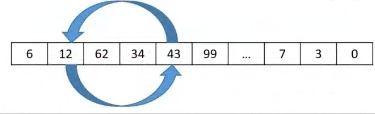

##Displacement Mutation

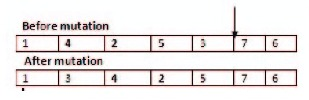

In [ ]:
def inversion_mutation(chromossome: Chromossome, rate = 0.001):
    chrom_len = len(chromossome)
    randoms = np.random.rand(chrom_len)
    for i in range(chrom_len):
        p = randoms[i]
        if p > (1.0 - rate):
            p1, p2 = random.randint(0, chrom_len-1), random.randint(0, chrom_len - 1)
            aux = chromossome[p1]
            chromossome[p1] = chromossome[p2]
            chromossome[p2] = aux
            muted_ratio += 1
    # print('Rate of mutation: '+ str(muted_ratio/chrom_len))
    return chromossome

In [ ]:
def displacement_mutation(chromossome: Chromossome, rate= 0.002):
    chrom_len = len(chromossome)
    if random.random() > (1.0 - rate):
        cuts = np.random.randint(0, chrom_len, size=2)
        cuts[1] = cuts[0] + 1
        cuts = np.sort(cuts)
        cutted = chromossome[cuts[0]:cuts[1]]
        one = np.concatenate((chromossome[0:cuts[0]], chromossome[cuts[1]:]), axis=None)
        insert_point = np.random.randint(0, len(one), size=1)[0]
        # print(f"{cuts}\t {cutted}\t{one}\t{insert_point}")
        chromossome =  np.concatenate((one[0:insert_point], cutted, one[insert_point:]), axis=None)
        chromossome = np.int8(chromossome)
    return chromossome

## Displacement Mutation
[1, 2, 3, 4, 5]

Posicao 3 => 3

Ela vai 5

[1, 2, 4, 5, 3]

[1, 2, 3, -1, 5, -1, 6]

Posicao 2 => 5

[1, 3, -1, 2, 5, -1, 6]

In [ ]:
pop = np.array(create_initial_population(10, generate_random_chromossome_with_pattern, 10))
print(pop[0])
print(displacement_mutation(pop[0], 1))

[ 4 -1  8 -1  3 -1  7 -1  0 -1  5 -1  1 -1  6 -1  2 -1  9]
[ 4 -1  8 -1  3 -1 -1  7 -1  0 -1  5 -1  1  6 -1  2 -1  9]


# Chromosome Threatment / Decoding

In [ ]:
def treat_chromossome(chrom):
    init = False
    groups = []
    current_group = []
    for gene in chrom:
        if gene == DAY_DELIMITER:
            if len(current_group) > 0:
                groups.append(current_group)
            current_group = []
        else:
            current_group.append(gene)
    
    if len(current_group) > 0:
        groups.append(current_group)
    return groups
            

# Evaluation

In [ ]:
# def apply_order_restriction(movies_per_day: [][]):
#     order = [[34, 11, False, True]] # Ordem, se já apareceu, se é pra executa
#     for i in range(len(movies_per_day):
#         restrictions_to_apply = list(filter(lambda a: a[3], order)
#         for restriction in restrictions_to_apply:
#             if any([m == restriction[0] for m in movies_per_day[i]]):
#                 restriction[3] = False
#             elif any([m == restriction[0] for m in movies_per_day[i]]):
#                 other_movie = restriction[1]
#                 other_group_index = list(filter(lambda day: any([other_movie == m[1] for m in day]), enumerate(movies_per_day)))[0][0]
#                 aux = movies_per_day[i]
#                 movies_per_day[i] = movies_per_day[other_group_index]
#                 movies_per_day[other_group_index] = aux
#                 restriction[3] = False

In [ ]:
def eval(chrom: Chromossome) -> float:
    e = -1
    movies_per_days = treat_chromossome(chrom)
    # apply_order_restriction(movies_per_day)
    per_day_sum  = [reduce(lambda x, x1: (x[0]*(movies[x1].rating), movies[x1].duration + x[1]), day, (1, 0)) for day in movies_per_days] # retorna [(1*Rating*Rating, Duração + Duraçao) dos filmes do dia]
    all_day_less_240 = all([x[1] <= 240 for x in per_day_sum])
    
    return sum([x[0] for x in per_day_sum]) if all_day_less_240 else -1

def eval_population(pop: List[Chromossome]):
    evals = []
    max_ = [0, 0]
    worst1 = [0, 10000000000]
    worst2 = [0, 10000000000]
    for i in range(len(pop)):
        e = eval(pop[i])
        if e > max_[1]:
            max_ = [i, e]
        if e < worst1[1]:
            worst1 = [i, e]
        elif e < worst2[1]:
            worst2 = [i, e]
        evals.append(e)
    return evals, max_[0], worst1[0], worst2[0]

In [ ]:
pop = create_initial_population(len(movies), generate_random_chromossome_with_pattern)
print(pop[0:3])
print(treat_chromossome(pop[0]))
print(treat_chromossome(pop[1])) 
eval(pop[0]), eval(pop[1])

[[92, -1, 34, -1, 40, -1, 86, -1, 32, -1, 81, -1, 69, -1, 70, -1, 18, -1, 59, -1, 90, -1, 56, -1, 38, -1, 22, -1, 35, -1, 65, -1, 31, -1, 10, -1, 49, -1, 48, -1, 72, -1, 89, -1, 15, -1, 79, -1, 11, -1, 42, -1, 53, -1, 62, -1, 17, -1, 8, -1, 55, -1, 73, -1, 84, -1, 27, -1, 47, -1, 75, -1, 25, -1, 39, -1, 54, -1, 61, -1, 41, -1, 88, -1, 66, -1, 16, -1, 0, -1, 21, -1, 51, -1, 77, -1, 74, -1, 7, -1, 82, -1, 58, -1, 71, -1, 50, -1, 6, -1, 12, -1, 24, -1, 45, -1, 43, -1, 64, -1, 19, -1, 13, -1, 91, -1, 1, -1, 37, -1, 80, -1, 36, -1, 4, -1, 20, -1, 52, -1, 78, -1, 23, -1, 85, -1, 67, -1, 9, -1, 30, -1, 33, -1, 63, -1, 3, -1, 28, -1, 76, -1, 5, -1, 83, -1, 26, -1, 68, -1, 14, -1, 2, -1, 44, -1, 57, -1, 60, -1, 46, -1, 87, -1, 29], [19, -1, 30, -1, 8, -1, 20, -1, 63, -1, 79, -1, 39, -1, 0, -1, 37, -1, 69, -1, 55, -1, 25, -1, 15, -1, 23, -1, 12, -1, 90, -1, 83, -1, 89, -1, 45, -1, 33, -1, 51, -1, 91, -1, 78, -1, 32, -1, 74, -1, 72, -1, 57, -1, 82, -1, 35, -1, 1, -1, 28, -1, 60, -1, 18, -1, 22, -

(731.5000000000002, 731.4999999999997)

# Cross-overs

In [ ]:
def get_pair_pointcuts(high: int):
    while True:
        pc1 = np.random.randint(low=1, high=high, dtype=int)
        pc2 = np.random.randint(low=1, high=high, dtype=int)
        if pc1 != pc2: break

    if pc2 > pc1:
        return pc1, pc2
    else:
        return pc2, pc1


def ox1(first: np.array, second: np.array):
    size = len(first)
    off1 = np.full(size, -1)
    off2 = np.full(size, -1)
    pc1, pc2 = get_pair_pointcuts(size)
    fillOff1 = {}
    fillOff2 = {}

    i = pc1
    j = 0
    p1 = first[pc1:pc2]
    p2 = second[pc1:pc2]
    while i < pc2:
        a = p1[j]
        b = p2[j]
        off1[i] = a
        fillOff1[a] = True
        off2[i] = b
        fillOff2[b] = True
        i = i + 1
        j = j + 1

    i = pc2
    j = pc2
    k = pc2
    while i < size:
        a = second[i]
        b = first[i]

        if a not in fillOff1:
            off1[j] = a
            j = j + 1

        if b not in fillOff2:
            off2[k] = b
            k = k + 1
        i = i + 1

    i = 0
    while i < pc2:
        if j == size: j = 0
        if k == size: k = 0
        a = second[i]
        b = first[i]

        if a not in fillOff1:
            off1[j] = a
            j = j + 1
        if b not in fillOff2:
            off2[k] = b
            k = k + 1
        i = i + 1

    return off1, off2

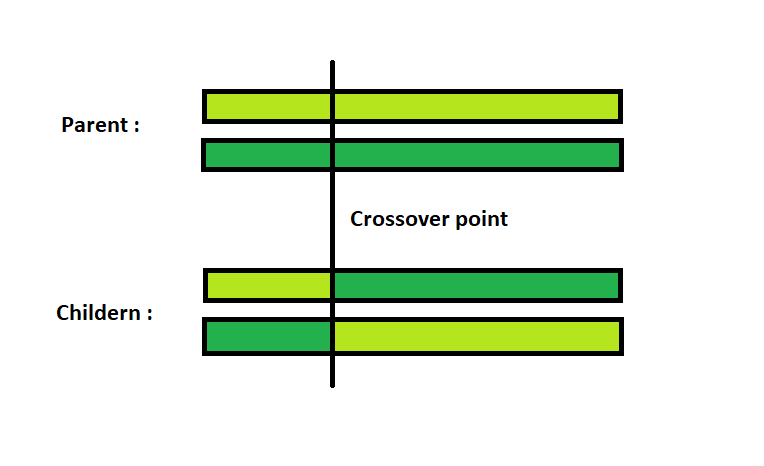

In [ ]:
def single_point_crossover(parents: List[Chromossome]):
    cut_point = random.randint(0, len(pop[0]))
    return np.array(parents[0][0:cut_point] + parents[1][cut_point:], parents[1][0:cut_point] + parents[0][cut_point:])

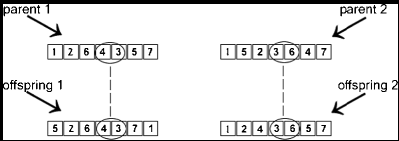

In [ ]:
def ox1_crossover(parents: List[Chromossome]) -> List[Chromossome]:
    first_parent, second_parent = parents[0], parents[1]
    off1, off2 = ox1(first_parent, second_parent)
    return np.array([off1, off2])

In [ ]:
def cross_over(pop: List[Chromossome], evals, max_: float, cross_function = single_point_crossover, show_evals=False):
    parents_count = 2
    pop_size = len(pop)
    probs = [ abs(e / max_) for e in evals]
    
    parent_positions = np.random.choice(pop_size, parents_count, probs)
    parents = [pop[parent] for parent in parent_positions]
    if show_evals:
        print(f"Eval Parents:{[evals[i] for i in parent_positions]}")


    offsprings = []

    while len(offsprings) < 2:
        offspring1, offspring2 = cross_function(parents)
        if eval(offspring1) >= 0:
            offsprings.append(offspring1)

        if eval(offspring2) >= 0:
            offsprings.append(offspring2)

    if show_evals:
        print("Offspring Eval: ", eval(offsprings[0]), eval(offsprings[1]))
    return offsprings[0], offsprings[1]

# Invalid Threating

In [ ]:
def replace_invalid(pop: List[Chromossome]):
    evals, _, _, _ = eval_population(pop)
    invalid_indexes = list(map(lambda a: a[0], list(filter(lambda a: a[1] == -1, list(enumerate(evals))))))
    while len(invalid_indexes) > 0:
        off_inc = 0
        offs = []
        while off_inc < len(invalid_indexes):
            off1, off2 = cross_over(pop, evals, best_eval, ox1_crossover, show_evals=True)
            offs.append(off1)
            offs.append(off2)
            off_inc += 2

        for i in invalid_indexes:
            pop[i] = offs[off_inc - 1]
            off_inc -= 1
        evals, _, _, _ = eval_population(pop)
        invalid_indexes = list(map(lambda a: a[0], list(filter(lambda a: a[1] == -1, list(enumerate(evals))))))

# Run

In [ ]:
MAX_EPOCHS = 1e6 # @param {type: "number"}
POP_SIZE=100 # @param {type: "number"}
epoch = 0
n_bests = [[-1, -1]]
 
pop = create_initial_population(len(movies), generate_random_chromossome_with_pattern, pop_size=POP_SIZE)

last_better=0

while epoch < MAX_EPOCHS or last_better < 1000:
    # Evaluate
    evals, best, worst1, worst2 = eval_population(pop)

    best_eval = evals[best]
    best_chrom = pop[best]
    
    # Is someone better ?
    if best_eval  > n_bests[-1][0]:
        print(best_eval, n_bests[-1][0])
        n_bests.append([best_eval, np.array(best_chrom)])
        last_better += 0
    
    # Generate the children
    off1, off2 = cross_over(pop, evals, best_eval, ox1_crossover)
    pop[worst1] = off1
    pop[worst2] = off2
    
    # Replace Invalid Configurations
    replace_invalid(pop)

    # Apply Mutation
    for i in range(len(pop)):
        pop[i] = displacement_mutation(pop[i], 0.001)

    epoch+=1

    if epoch % 10000 == 0:
        print(epoch)
    last_better += 1

731.5000000000005 -1
775.3799999999999 731.5000000000005
775.8600000000005 775.3799999999999
825.4799999999999 775.8600000000005
832.3 825.4799999999999
832.4199999999998 832.3
869.7199999999998 832.4199999999998


KeyboardInterrupt: ignored

# Out

In [ ]:
print(n_bests[-1])

In [ ]:
groups = treat_chromossome(n_bests[-1][1])

In [ ]:
days = []
for i in range(len(groups)):
    movies_name, each_duration, sum_duration, rating, sum_rate = [], [], 0, [], 0
    for index in groups[i]:
        movies_name.append(movies[index].name)
        each_duration.append(str(movies[index].duration))
        sum_duration +=movies[index].duration
        rating.append(str(movies[index].rating))
        sum_rate +=movies[index].rating
    days.append([i+1,', '.join(movies_name), ', '.join(each_duration), sum_duration, ', '.join(rating), sum_rate])

In [ ]:
days = sorted(days, key=lambda a: a[-1], reverse=True)

In [ ]:
print(tabulate(days,headers=['Dia', "Filmes", 'Duração', 'Duração Acumulada', 'Rating', 'Rating Acumulado'],tablefmt="grid"))

## Duration Relation

In [ ]:
time_days = sorted(days, key=lambda a: a[-3], reverse=True)
print(tabulate(time_days,headers=['Dia', "Filmes", 'Duração', 'Duração Acumulada', 'Rating', 'Rating Acumulado'],tablefmt="grid"))